In [2]:
import pandas as pd
import sys
import matplotlib.pyplot as plt


In [3]:

def load_data():
    return pd.read_csv('train.csv', encoding='utf8')

In [4]:
df = load_data()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 1 split name into first name and second name
# 2 Change Sex male to  M and female to F
# 3 replace missing data with
# 4 Create an age group 18 45 55

In [19]:
def split_name(df):
    def split_name_fun(string):
        arr=string.split(', ')
        firstName=arr[0]
        secondName=arr[1]
        return pd.Series(
            (firstName, secondName),
            index='firstName secondName'.split()
        )

    res=df['Name'].apply(split_name_fun)
    df[res.columns]=res
    return df

In [24]:
# Change sex
def convert_sex(df):
    mapping={'male':'M','female':'F'}
    df['Sex']=df['Sex'].map(mapping)
    return df

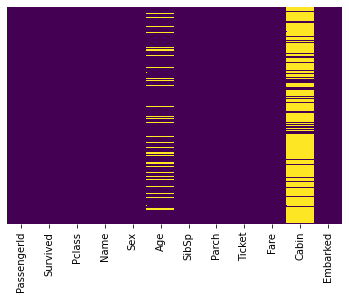

In [6]:
import seaborn as sns

sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

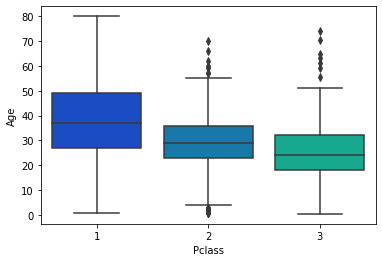

In [32]:
sns.boxplot(x='Pclass',
            y='Age',
            data=df,
            palette='winter')

In [39]:
# Calculate fill consumer per
pclass_age_map = {
  1: 37,
  2: 29,
  3: 24,
}

def replace_age_na(x_df,fill_map):
    cond=x_df['Age'].isna()
    res=x_df.loc[cond,'Pclass'].map(fill_map)
    x_df.loc[cond,'Age']=res

    return x_df

In [48]:
# Creating age group
def create_age_group(x_df):
    bins=[0, 12, 18, 60, sys.maxsize]
    tmp=pd.cut(x_df['Age'],bins,labels=['<12', 'Teen', 'Adult', 'Older'])
    x_df['ageGroup']=tmp
    return x_df

In [49]:
res=(
    load_data()
    .pipe(split_name)
    .pipe(convert_sex)
    .pipe(replace_age_na, replace_map)
    .pipe(create_age_group)
)

res.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,ageGroup
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult


In [50]:
pd.pivot_table(res,
    index='ageGroup',
    values='Fare',
    aggfunc=['count','mean'])

,count,mean
,Fare,Fare
ageGroup,,
<12,69,31.536352
Teen,70,33.451313
Adult,730,31.871483
Older,22,41.371214


In [51]:
pd.pivot_table(res,
    index='ageGroup',
    values='Fare',
    columns='Sex',
    aggfunc=['count','mean'])

count            mean           
Sex          F    M          F          M
ageGroup                                 
<12         32   37  27.956378  34.632546
Teen        36   34  44.596069  21.650982
Adult      243  487  46.498166  24.573158
Older        3   19  55.848600  39.085311

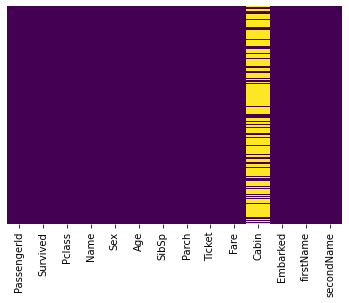

In [41]:
sns.heatmap(res.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')